<a href="https://colab.research.google.com/github/sonamgupta1105/genentech_challenge/blob/main/genetech_404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and load data 

In [29]:
#import 
import numpy as np
import pandas as pd 
from numpy import cov
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#access zipped data  
from google.colab import drive 
drive.mount('/content/drive')
!unzip "drive/My Drive/Data/genetech_404.zip"

Mounted at /content/drive
Archive:  drive/My Drive/Data/genetech_404.zip
  inflating: test_B.csv              
  inflating: __MACOSX/._test_B.csv   
  inflating: test_A.csv              
  inflating: __MACOSX/._test_A.csv   
  inflating: sample_submission.csv   
  inflating: __MACOSX/._sample_submission.csv  
  inflating: dev_set.csv             
  inflating: __MACOSX/._dev_set.csv  
  inflating: dev_3.csv               
  inflating: __MACOSX/._dev_3.csv    
  inflating: dev_2.csv               
  inflating: __MACOSX/._dev_2.csv    
  inflating: dev_1.csv               
  inflating: __MACOSX/._dev_1.csv    


In [21]:
#read in data 
dev1 = pd.read_csv('dev_1.csv')
dev1.head()

,RID_HASH,VISCODE,AGE,PTGENDER_num,PTEDUCAT,DX_num,APOE4,CDRSB,MMSE,ADAS13,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp
0,c8436bb8d6423ae20372637fe3ed243d1841d76832742a...,12,NaN,NaN,18.0,1.0,0.0,0.5,29.0,7.00,NaN,5806.0,NaN,3237.0,17626.0,19256.0
1,efbf8e1fae0f9e1691d857c70b0e1c42f4a5dc92cbd3f2...,36,66.6,NaN,16.0,0.0,0.0,0.0,28.0,7.00,26394.0,7004.0,NaN,3461.0,17094.0,23828.0
2,5af3d63fa36791c95aa708d02a2bcaaa7446307edf0b76...,138,91.3,0.0,14.0,0.0,0.0,0.0,29.0,16.33,49889.6,6750.5,984359.0,4450.0,14741.0,18083.0
3,90511e19cfc88ad5488e4971578eeffd23449914ffc4ef...,12,62.5,NaN,NaN,1.0,NaN,1.5,29.0,13.00,19305.3,NaN,NaN,NaN,NaN,NaN
4,8bd78c9a63d7e92659baefc24939dd710f76a58fc42d39...,12,76.4,1.0,18.0,1.0,0.0,0.5,27.0,17.00,40844.0,NaN,1122510.0,NaN,NaN,NaN


In [ ]:
dev2 = pd.read_csv('dev_2.csv')
dev2.head()

In [ ]:
dev3 = pd.read_csv('dev_3.csv')
dev3.head()

In [ ]:
dev_set = pd.read_csv('dev_set.csv')
dev_set.head()

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

In [ ]:
testA = pd.read_csv('test_A.csv')
testA.head()

In [ ]:
testB = pd.read_csv('test_B.csv')
testB.head()

Dev1 EDA

In [22]:
#finding where missing values are 
dev1.isna().sum()

RID_HASH           0
VISCODE            0
AGE             1950
PTGENDER_num    2057
PTEDUCAT         190
DX_num          1448
APOE4            238
CDRSB           1448
MMSE            1448
ADAS13          1448
Ventricles      1950
Hippocampus     2058
WholeBrain      2057
Entorhinal      2058
Fusiform        2058
MidTemp         2058
dtype: int64

In [23]:
#df of missing counts per column
missing_dev1 = pd.DataFrame({"col_name" : dev_1.columns, 
                          "missing_count" : np.round(dev_1.isna()).sum()}).set_index("col_name")
missing_dev1

,missing_count
col_name,
RID_HASH,0
VISCODE,0
AGE,1950
PTGENDER_num,2057
PTEDUCAT,190
DX_num,1448
APOE4,238
CDRSB,1448
MMSE,1448


In [25]:
#check skew of each column
dev1.agg(["skew"]).transpose()

,skew
VISCODE,1.959210
AGE,-0.139893
PTGENDER_num,0.230647
PTEDUCAT,-0.550274
DX_num,0.302823
APOE4,0.813873
CDRSB,2.211273
MMSE,-1.834380
ADAS13,1.189592
Ventricles,1.197245


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of CDRSB')]

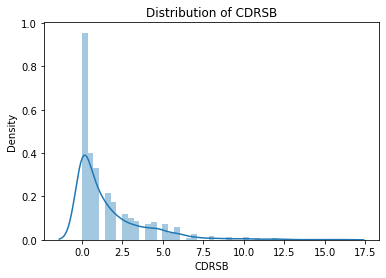

In [30]:
#plotting the distribution of cdrsb column
sns.distplot(dev1['CDRSB']).set(title = "Distribution of CDRSB")

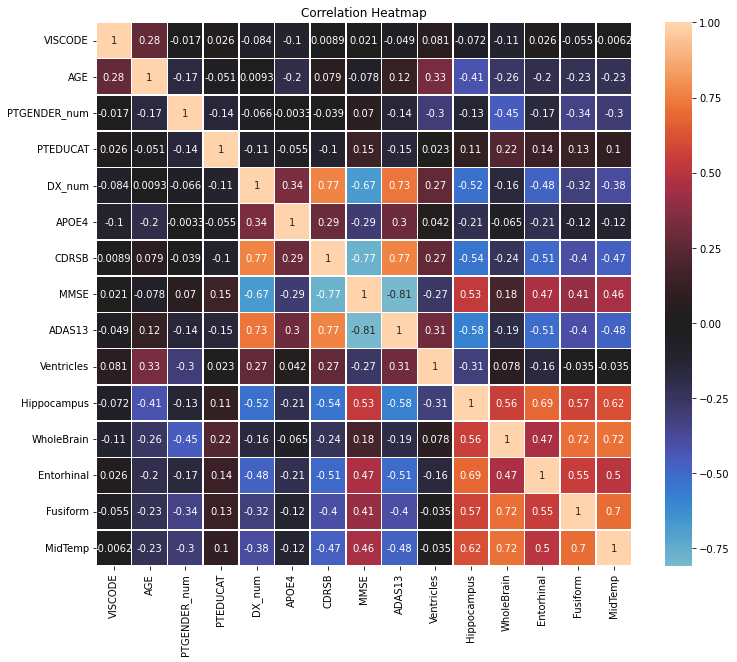

In [31]:
#correlation heatmap of dev1

sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(dev1.corr(), center = 0, linewidth = .5, annot = True).set(title='Correlation Heatmap');